<a href="https://colab.research.google.com/github/ms236566/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2205_visualization(1)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
!pip install seaborn

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

Yahoo Finance предлагает отличный спектр рыночных данных по акциям, облигациям, валютам и криптовалютам. Он также предоставляет новостные репортажи с различной информацией о различных рынках со всего мира — все это доступно через  библиотеку Python yfinance

In [ ]:
from pandas_datareader import data as web
import datetime
import yfinance as yf

Практически все методы находятся в модуле Tickers. Модуль download предназначен для быстрой загрузки исторических данных нескольких тикеров одновременно.

In [ ]:
aapl = yf.download('AAPL','2017-01-01','2018-12-31')
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989264,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959057,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096153,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398230,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649179,134247600
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,36.121986,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.187359,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.665314,234330000


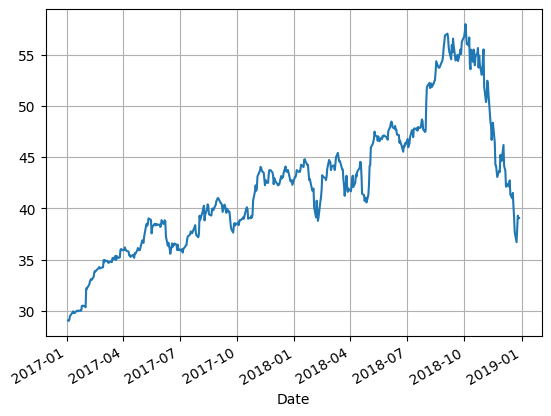

In [ ]:
aapl['Close'].plot(grid=True)

plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

Ящик с усами, диаграмма размаха, коробчатая диаграмма, блочная диаграмма с ограничителями выбросов — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квантили, минимальное и максимальное значение выборки и выбросы.

<Axes: >

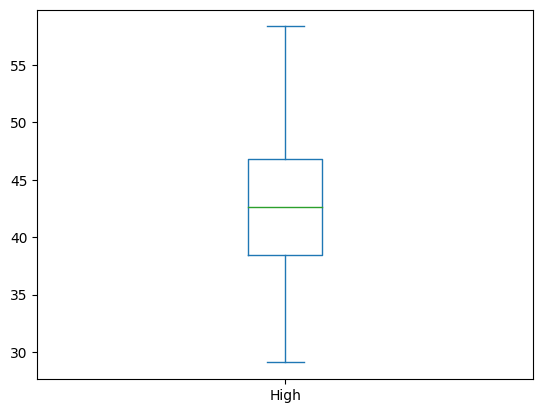

In [ ]:
aapl['High'].plot.box()

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль).[5] Концы усов — края статистически значимой выборки (без выбросов), и они могут определяться несколькими способами. Наиболее распространённые значения, определяющие длину «усов»:
- Минимальное и максимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
- Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний (в этом случае присутствуют выбросы).

Данные, выходящие за границы усов (выбросы), отображаются на графике в виде точек, маленьких кружков или звёздочек.

<Axes: ylabel='Frequency'>

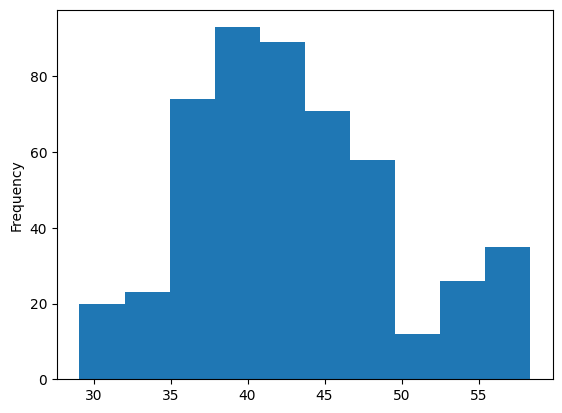

In [ ]:
aapl['High'].plot(kind='hist')

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
average_ratings = np.load('/content/drive/MyDrive/L5/average_ratings.npy')
pd.DataFrame(average_ratings)

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


Text(0.5, 1.0, 'Изменение среднего рейтинга трёх рецептов')

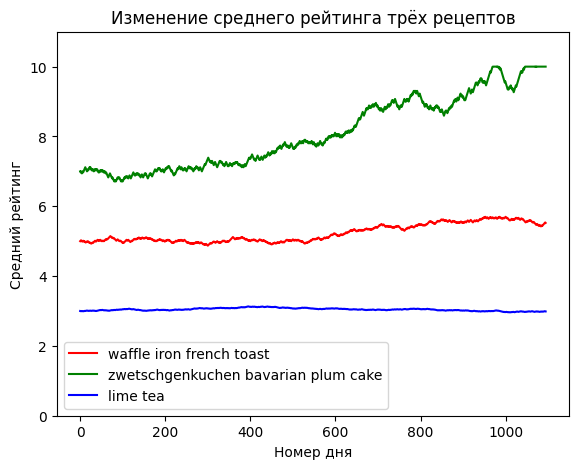

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

y1_line, = ax.plot(average_ratings[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(average_ratings[2], 'b', label = 'lime tea')

ax.set_ylim([0, 11])

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')

ax.legend(handles=[y1_line, y2_line, y3_line])

ax.set_title('Изменение среднего рейтинга трёх рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


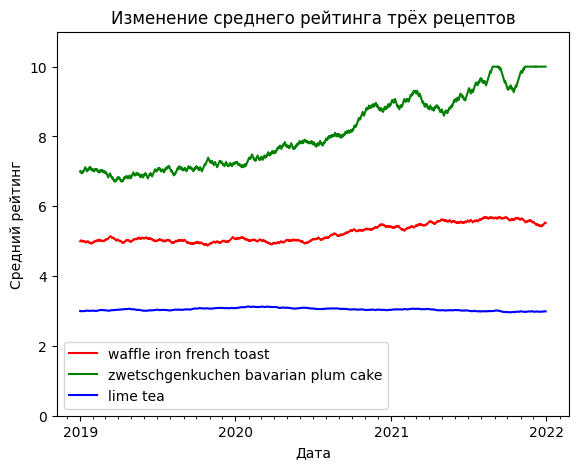

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

time_range = pd.date_range(start='2019/1/1', end='2021/12/30', freq='D')

y1_line, = ax.plot(time_range, average_ratings[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(time_range, average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(time_range, average_ratings[2], 'b', label = 'lime tea')

ax.set_ylim([0, 11])

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax.legend(handles=[y1_line, y2_line, y3_line])

ax.set_title('Изменение среднего рейтинга трёх рецептов')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('/content/drive/MyDrive/L2/recipes_sample.csv', delimiter=',')
reviews = pd.read_csv('/content/drive/MyDrive/L2/reviews_sample.csv', delimiter=',', index_col=0)
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
short = recipes[(recipes.minutes < 5)]
average = recipes[(recipes.minutes <= 50) & (recipes.n_ingredients >= 5)]
long = recipes[(recipes.minutes > 50)]

In [73]:
print('шаг short: ', len(short), 'шаг average: ', len(average),'шаг long: ', len(long))

шаг short:  675 шаг average:  12115 шаг long:  10422


In [74]:
print(short['minutes'].mean())
print(average['minutes'].mean())
print(long['minutes'].mean())

1.9185185185185185
27.476269087907554
305.9641143734408


In [54]:
x = np.mean(short, axis=0)

TypeError: can only concatenate str (not "int") to str

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"